<a href="https://colab.research.google.com/github/dikshap07/py/blob/master/Label_encoding_FINAL_YR_PROJECT_CRIME_DATA_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Upload Data from Drive

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


##### Required Library

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [0]:
path = "/content/drive/My Drive/FINAL YEAR PROJECT MATERIAL/data/MUMBAI CRIME COMPLAINT DATA.csv"
mumbai_crime_data = pd.read_csv(path)

#uploading data from google drive

#### Data Description 

In [0]:
mumbai_crime_data.head()

,Unnamed: 0,CMPLNT_FR_DT,OFNS_DESC,PD_DESC,PREM_TYP_DESC,LAW_CAT_CD,BORO_NM,VIC_AGE_GROUP,VIC_SEX
0,0,04/10/2008,PETIT LARCENY,"LARCENY,PETIT FROM AUTO",STREET,MISDEMEANOR,THANE,18-24,M
1,4,04/11/2006,THEFT-FRAUD,"FRAUD,UNCLASSIFIED-FELONY",COMMERCIAL BUILDING,FELONY,DADAR,25-44,M
2,8,04/21/2006,ROBBERY,"ROBBERY,DWELLING",RESIDENCE - PUBLIC HOUSING,FELONY,BORIVALI,25-44,M
3,9,04/14/2006,VEHICLE AND TRAFFIC LAWS,LEAVING SCENE-ACCIDENT-PERSONA,STREET,MISDEMEANOR,DADAR,45-64,F
4,10,08/12/2007,FELONY ASSAULT,"ASSAULT 2,1,UNCLASSIFIED",STREET,FELONY,NAVI MUMBAI,<18,M


In [0]:
mumbai_crime_data.reset_index #to reset the index of the dataset

<bound method DataFrame.reset_index of         Unnamed: 0 CMPLNT_FR_DT  ... VIC_AGE_GROUP VIC_SEX
0                0   04/10/2008  ...         18-24       M
1                4   04/11/2006  ...         25-44       M
2                8   04/21/2006  ...         25-44       M
3                9   04/14/2006  ...         45-64       F
4               10   08/12/2007  ...           <18       M
...            ...          ...  ...           ...     ...
228071      323067   05/16/2010  ...           NaN     NaN
228072      323068          NaN  ...           NaN     NaN
228073      323069          NaN  ...           NaN     NaN
228074      323070          NaN  ...           NaN     NaN
228075      323071          NaN  ...           NaN     NaN

[228076 rows x 9 columns]>

In [0]:
mumbai_crime_data.head()

,Unnamed: 0,CMPLNT_FR_DT,OFNS_DESC,PD_DESC,PREM_TYP_DESC,LAW_CAT_CD,BORO_NM,VIC_AGE_GROUP,VIC_SEX
0,0,04/10/2008,PETIT LARCENY,"LARCENY,PETIT FROM AUTO",STREET,MISDEMEANOR,THANE,18-24,M
1,4,04/11/2006,THEFT-FRAUD,"FRAUD,UNCLASSIFIED-FELONY",COMMERCIAL BUILDING,FELONY,DADAR,25-44,M
2,8,04/21/2006,ROBBERY,"ROBBERY,DWELLING",RESIDENCE - PUBLIC HOUSING,FELONY,BORIVALI,25-44,M
3,9,04/14/2006,VEHICLE AND TRAFFIC LAWS,LEAVING SCENE-ACCIDENT-PERSONA,STREET,MISDEMEANOR,DADAR,45-64,F
4,10,08/12/2007,FELONY ASSAULT,"ASSAULT 2,1,UNCLASSIFIED",STREET,FELONY,NAVI MUMBAI,<18,M


### Data Preprocessing

In [0]:
mumbai_crime_data.drop(['Unnamed: 0'], axis = 1, inplace = True) #Dropping unnecessary columns

In [0]:
mumbai_crime_data.head()

,CMPLNT_FR_DT,OFNS_DESC,PD_DESC,PREM_TYP_DESC,LAW_CAT_CD,BORO_NM,VIC_AGE_GROUP,VIC_SEX
0,04/10/2008,PETIT LARCENY,"LARCENY,PETIT FROM AUTO",STREET,MISDEMEANOR,THANE,18-24,M
1,04/11/2006,THEFT-FRAUD,"FRAUD,UNCLASSIFIED-FELONY",COMMERCIAL BUILDING,FELONY,DADAR,25-44,M
2,04/21/2006,ROBBERY,"ROBBERY,DWELLING",RESIDENCE - PUBLIC HOUSING,FELONY,BORIVALI,25-44,M
3,04/14/2006,VEHICLE AND TRAFFIC LAWS,LEAVING SCENE-ACCIDENT-PERSONA,STREET,MISDEMEANOR,DADAR,45-64,F
4,08/12/2007,FELONY ASSAULT,"ASSAULT 2,1,UNCLASSIFIED",STREET,FELONY,NAVI MUMBAI,<18,M


In [0]:
#renaming columns

mumbai_crime_data.rename(columns= {"CMPLNT_FR_DT": "FILING_DATE_OF_COMPLAINT", "OFNS_DESC": "DESCRIPTION_OF_OFFENSE", "PD_DESC": "OFFENSE_DESCRIPTION_IN_DETAIL", "PREM_TYP_DESC":"PLACE_OF_CRIME",
                                 "LAW_CAT_CD":"CRIME_ACC_LAW","BORO_NM":"AREA_OF_CRIME"}, inplace = True)
mumbai_crime_data.head()


,FILING_DATE_OF_COMPLAINT,DESCRIPTION_OF_OFFENSE,OFFENSE_DESCRIPTION_IN_DETAIL,PLACE_OF_CRIME,CRIME_ACC_LAW,AREA_OF_CRIME,VIC_AGE_GROUP,VIC_SEX
0,04/10/2008,PETIT LARCENY,"LARCENY,PETIT FROM AUTO",STREET,MISDEMEANOR,THANE,18-24,M
1,04/11/2006,THEFT-FRAUD,"FRAUD,UNCLASSIFIED-FELONY",COMMERCIAL BUILDING,FELONY,DADAR,25-44,M
2,04/21/2006,ROBBERY,"ROBBERY,DWELLING",RESIDENCE - PUBLIC HOUSING,FELONY,BORIVALI,25-44,M
3,04/14/2006,VEHICLE AND TRAFFIC LAWS,LEAVING SCENE-ACCIDENT-PERSONA,STREET,MISDEMEANOR,DADAR,45-64,F
4,08/12/2007,FELONY ASSAULT,"ASSAULT 2,1,UNCLASSIFIED",STREET,FELONY,NAVI MUMBAI,<18,M


##### Studying 'CRIME_ACC_LAW' column

In [0]:
#getting unique values of type of offense

mumbai_crime_data['CRIME_ACC_LAW'].value_counts()  #may remove it later

MISDEMEANOR    115755
FELONY          74644
VIOLATION       37673
Name: CRIME_ACC_LAW, dtype: int64

#####Preprocessing and studying    'PLACE_OF_CRIME'    column

In [0]:
mumbai_crime_data['PLACE_OF_CRIME'].value_counts()

STREET                        76788
RESIDENCE - APT. HOUSE        57177
RESIDENCE-HOUSE               31810
RESIDENCE - PUBLIC HOUSING    14660
OTHER                          5443
                              ...  
OTHER HOUSE OF WORSHIP           32
CEMETERY                         28
PHOTO/COPY                       25
MOSQUE                           23
LOAN COMPANY                     21
Name: PLACE_OF_CRIME, Length: 68, dtype: int64

In [0]:
list_of_places = mumbai_crime_data['PLACE_OF_CRIME'].unique()

In [0]:
list_of_places

array(['STREET', 'COMMERCIAL BUILDING', 'RESIDENCE - PUBLIC HOUSING',
       'OTHER', nan, 'SCHOOL', 'RESIDENCE-HOUSE',
       'RESIDENCE - APT. HOUSE', 'SMALL MERCHANT', 'BANK', 'FAST FOOD',
       'RESTAURANT/DINER', 'PARK/PLAYGROUND', 'ATM', 'HOTEL/MOTEL',
       'PARKING LOT/GARAGE (PUBLIC)', 'BUS (NYC TRANSIT)',
       'BEAUTY & NAIL SALON', 'LOCAL TRAIN', 'GROCERY/BODEGA',
       'CHAIN STORE', 'CHURCH', 'DEPARTMENT STORE', 'JEWELRY',
       'BAR/NIGHT CLUB', 'MARINA/PIER', 'HOSPITAL', 'CLOTHING/BOUTIQUE',
       'PUBLIC BUILDING', 'CHECK CASHING BUSINESS', 'TELECOMM. STORE',
       'DRY CLEANER/LAUNDRY', 'HIGHWAY/PARKWAY', 'CANDY STORE',
       'CEMETERY', 'VIDEO STORE', 'BUS STOP', 'AIRPORT TERMINAL',
       'STORE UNCLASSIFIED', 'BRIDGE', 'OPEN AREAS (OPEN LOTS)',
       'PARKING LOT/GARAGE (PRIVATE)', 'LOAN COMPANY',
       'DOCTOR/DENTIST OFFICE', 'FOOD SUPERMARKET', 'GAS STATION',
       'VARIETY STORE', 'TUNNEL', 'BUS (OTHER)', 'TAXI(UNLICENSED)',
       'TAXI (YELLOW LICE

In [0]:
mumbai_crime_data['PLACE_OF_CRIME']=mumbai_crime_data['PLACE_OF_CRIME'].replace({'BUS TERMINAL':'BUS STOP','BUS (NYC TRANSIT)':'BUS STOP','TRANSIT FACILITY (OTHER)':'BUS STOP',
                                             'BOOK/CARD':'STORE','VARIETY STORE':'SMALL MERCHANT','PARKING LOT/GARAGE (PRIVATE)':'PARKING LOT/GARAGE',
                                             'PARKING LOT/GARAGE (PUBLIC)':'PARKING LOT/GARAGE','SYNAGOGUE':'CHURCH','GAS STATION':'PETROL PUMP',
                                             'CHECK CASHING BUSINESS':'BANK','FAST FOOD':'STORE','SHOE':'STORE','PHOTO/COPY':'STORE','STORE UNCLASSIFIED':'PUBLIC BUILDING',
                                             'VIDEO STORE':'STORE','STORAGE FACILITY':'FACTORY/WAREHOUSE','GROCERY/BODEGA':'FOOD SUPERMARKET','CANDY STORE':'STORE',
                                             'TELECOMM. STORE':'STORE','SOCIAL CLUB/POLICY':'BAR/NIGHT CLUB',})

In [0]:
mumbai_crime_data['PLACE_OF_CRIME'].value_counts()
#modified_list_of_places = mumbai_crime_data['PLACE_OF_CRIME'].unique()
#modified_list_of_places


STREET                        76788
RESIDENCE - APT. HOUSE        57177
RESIDENCE-HOUSE               31810
RESIDENCE - PUBLIC HOUSING    14660
OTHER                          5443
COMMERCIAL BUILDING            4436
SCHOOL                         3701
PARKING LOT/GARAGE             3204
LOCAL TRAIN                    2951
BAR/NIGHT CLUB                 2811
RESTAURANT/DINER               2308
FOOD SUPERMARKET               2008
PARK/PLAYGROUND                1949
PUBLIC BUILDING                1893
STORE                          1393
CHAIN STORE                    1272
HOSPITAL                       1165
HOTEL/MOTEL                     963
DEPARTMENT STORE                921
BUS STOP                        913
BANK                            896
GYM/FITNESS FACILITY            895
SMALL MERCHANT                  713
CLOTHING/BOUTIQUE               609
DOCTOR/DENTIST OFFICE           554
BEAUTY & NAIL SALON             503
DRY CLEANER/LAUNDRY             397
CHURCH                      

#####Preprocessing and studying 'DESCRIPTION_OF_OFFENSE' column

In [0]:
#getting unique values in DESCRIPTION_OF_OFFENSE column

print(mumbai_crime_data['DESCRIPTION_OF_OFFENSE'].unique())

['PETIT LARCENY' 'THEFT-FRAUD' 'ROBBERY' 'VEHICLE AND TRAFFIC LAWS'
 'FELONY ASSAULT' 'GRAND LARCENY' 'MURDER & NON-NEGL. MANSLAUGHTER'
 'HARRASSMENT 2' 'OFF. AGNST PUB ORD SENSBLTY &'
 'ASSAULT 3 & RELATED OFFENSES' 'GRAND LARCENY OF MOTOR VEHICLE'
 'MISCELLANEOUS PENAL LAW' 'KIDNAPPING & RELATED OFFENSES' 'FORGERY'
 'CRIMINAL MISCHIEF & RELATED OF' 'FRAUDS' 'BURGLARY' 'RAPE'
 'DANGEROUS WEAPONS' nan 'ARSON' 'DANGEROUS DRUGS'
 'POSSESSION OF STOLEN PROPERTY' 'SEX CRIMES' 'ADMINISTRATIVE CODE'
 'INTOXICATED & IMPAIRED DRIVING' 'UNAUTHORIZED USE OF A VEHICLE'
 'OFFENSES AGAINST PUBLIC ADMINI' 'CRIMINAL TRESPASS'
 'OFFENSES INVOLVING FRAUD' 'OTHER OFFENSES RELATED TO THEF'
 'CHILD ABANDONMENT/NON SUPPORT' 'OFFENSES AGAINST THE PERSON'
 'PETIT LARCENY OF MOTOR VEHICLE' 'GAMBLING' 'JOSTLING'
 'DISORDERLY CONDUCT' 'FRAUDULENT ACCOSTING'
 'OTHER STATE LAWS (NON PENAL LA' 'OTHER STATE LAWS' "BURGLAR'S TOOLS"
 'OFFENSES RELATED TO CHILDREN' 'PROSTITUTION & RELATED OFFENSES'
 'HOMICIDE-NEGLIGEN

In [0]:
mumbai_crime_data['DESCRIPTION_OF_OFFENSE']=mumbai_crime_data['DESCRIPTION_OF_OFFENSE'].replace({'FRAUDULENT ACCOSTING':'FRAUDS',
                                                                                                 'SEX CRIMES':'SEX CRIMES:RAPE,SEXUAL ASSAULT,PROSTITUTION',
                                                                                                 'PROSTITUTION & RELATED OFFENSES':'SEX CRIMES:RAPE,SEXUAL ASSAULT,PROSTITUTION',})

In [0]:
mumbai_crime_data['DESCRIPTION_OF_OFFENSE'].value_counts()

HARRASSMENT 2                                  37572
PETIT LARCENY                                  32543
ASSAULT 3 & RELATED OFFENSES                   31110
CRIMINAL MISCHIEF & RELATED OF                 23107
GRAND LARCENY                                  22624
OFF. AGNST PUB ORD SENSBLTY &                  18699
ROBBERY                                        12133
FELONY ASSAULT                                  9913
BURGLARY                                        9126
GRAND LARCENY OF MOTOR VEHICLE                  6850
MISCELLANEOUS PENAL LAW                         4251
THEFT-FRAUD                                     3358
SEX CRIMES:RAPE,SEXUAL ASSAULT,PROSTITUTION     3291
OFFENSES AGAINST PUBLIC ADMINI                  2684
VEHICLE AND TRAFFIC LAWS                        2433
FRAUDS                                          1246
RAPE                                             910
CRIMINAL TRESPASS                                832
MURDER & NON-NEGL. MANSLAUGHTER               

In [0]:
list_of_crimes_to_remove = ['DISORDERLY CONDUCT',
                            'OTHER STATE LAWS (NON PENAL LA',
                            'HOMICIDE-NEGLIGENT,UNCLASSIFIE',
                            'GAMBLING',
                            'JOSTLING',
                            'HOMICIDE-NEGLIGENT-VEHICLE',
                            'ENDAN WELFARE INCOMP',
                            'MAHARASTRA STATE LAWS-UNCLASSIFIED FELONY',
                            'OTHER STATE LAWS',
                            'LOITERING/GAMBLING (CARDS, DIC',
                            'OFFENSES AGAINST PUBLIC SAFETY',
                            'LOITERING',
                            'DISRUPTION OF A RELIGIOUS SERV',
                            'FRAUDULENT ACCOSTING',
                            'PETIT LARCENY OF MOTOR VEHICLE',
                            'OFFENSES INVOLVING FRAUD',
                            'CHILD ABANDONMENT/NON SUPPORT',
                            'OFFENSES RELATED TO CHILDREN',
                            "BURGLAR'S TOOLS",
                            'DANGEROUS WEAPONS',
                            'OFF. AGNST PUB ORD SENSBLTY &',
                            'OFFENSES AGAINST PUBLIC ADMINI',
                            'DANGEROUS DRUGS',
                            'MISCELLANEOUS PENAL LAW',
                            'ADMINISTRATIVE CODE',
                            'OFFENSES AGAINST THE PERSON',
                            'VEHICLE AND TRAFFIC LAWS',
                            'POSSESSION OF STOLEN PROPERTY',
                            'OTHER OFFENSES RELATED TO THEF',
                            'FORGERY']                       


In [0]:

for crime in list_of_crimes_to_remove:
  mumbai_crime_data = mumbai_crime_data.drop(mumbai_crime_data[mumbai_crime_data['DESCRIPTION_OF_OFFENSE']== crime].index)


In [0]:
mumbai_crime_data['DESCRIPTION_OF_OFFENSE'].value_counts()

HARRASSMENT 2                                  37572
PETIT LARCENY                                  32543
ASSAULT 3 & RELATED OFFENSES                   31110
CRIMINAL MISCHIEF & RELATED OF                 23107
GRAND LARCENY                                  22624
ROBBERY                                        12133
FELONY ASSAULT                                  9913
BURGLARY                                        9126
GRAND LARCENY OF MOTOR VEHICLE                  6850
THEFT-FRAUD                                     3358
SEX CRIMES:RAPE,SEXUAL ASSAULT,PROSTITUTION     3291
FRAUDS                                          1246
RAPE                                             910
CRIMINAL TRESPASS                                832
MURDER & NON-NEGL. MANSLAUGHTER                  780
UNAUTHORIZED USE OF A VEHICLE                    461
INTOXICATED & IMPAIRED DRIVING                   253
ARSON                                            166
KIDNAPPING & RELATED OFFENSES                 

In [0]:
mumbai_crime_data['DESCRIPTION_OF_OFFENSE']=mumbai_crime_data['DESCRIPTION_OF_OFFENSE'].replace({'THEFT-FRAUD':'FRAUDS/THEFT-FRAUD',
                                                                                                                   'FRAUDS':'FRAUDS/THEFT-FRAUD',
                                                                                                 'SEX CRIMES':'SEX CRIMES:HARRASSMENT,SEXUAL ASSAULT,PROSTITUTION',
                                                                                                 'HARRASSMENT 2':'SEX CRIMES:HARRASSMENT,SEXUAL ASSAULT,PROSTITUTION',
                                                                                                 'ASSAULT 3 & RELATED OFFENSES':'ASSAULT','FELONY ASSAULT':'ASSAULT',
                                                                                                 'BURGLARY':'BURGLARY/ROBBERY','ROBBERY':'BURGLARY/ROBBERY',
                                                                                                 'PETIT LARCENY':'LARCENY','GRAND LARCENY':'LARCENY',
                                                                                                 'GRAND LARCENY OF MOTOR VEHICLE' :'LARCENY/UNAUTHORISED USE OF MOTOR VEHICLE',
                                                                                                 'UNAUTHORIZED USE OF A VEHICLE':'LARCENY/UNAUTHORISED USE OF MOTOR VEHICLE',
                                                                                                 'CRIMINAL MISCHIEF & RELATED OF':'CRIMINAL MISCHIEF/TRESPASS',
                                                                                                 'CRIMINAL TRESPASS':'CRIMINAL MISCHIEF/TRESPASS'})

In [0]:
mumbai_crime_data['DESCRIPTION_OF_OFFENSE'].value_counts()

LARCENY                                               55167
ASSAULT                                               41023
SEX CRIMES:HARRASSMENT,SEXUAL ASSAULT,PROSTITUTION    37572
CRIMINAL MISCHIEF/TRESPASS                            23939
BURGLARY/ROBBERY                                      21259
LARCENY/UNAUTHORISED USE OF MOTOR VEHICLE              7311
FRAUDS/THEFT-FRAUD                                     4604
SEX CRIMES:RAPE,SEXUAL ASSAULT,PROSTITUTION            3291
RAPE                                                    910
MURDER & NON-NEGL. MANSLAUGHTER                         780
INTOXICATED & IMPAIRED DRIVING                          253
ARSON                                                   166
KIDNAPPING & RELATED OFFENSES                           154
Name: DESCRIPTION_OF_OFFENSE, dtype: int64

####Removing outliers or crimes with min frequency

In [0]:
mumbai_crime_data['DESCRIPTION_OF_OFFENSE'].value_counts()

LARCENY                                               55167
ASSAULT                                               41023
SEX CRIMES:HARRASSMENT,SEXUAL ASSAULT,PROSTITUTION    37572
CRIMINAL MISCHIEF/TRESPASS                            23939
BURGLARY/ROBBERY                                      21259
LARCENY/UNAUTHORISED USE OF MOTOR VEHICLE              7311
FRAUDS/THEFT-FRAUD                                     4604
SEX CRIMES:RAPE,SEXUAL ASSAULT,PROSTITUTION            3291
RAPE                                                    910
MURDER & NON-NEGL. MANSLAUGHTER                         780
INTOXICATED & IMPAIRED DRIVING                          253
ARSON                                                   166
KIDNAPPING & RELATED OFFENSES                           154
Name: DESCRIPTION_OF_OFFENSE, dtype: int64

In [0]:
mumbai_crime_data['DESCRIPTION_OF_OFFENSE'].value_counts()

LARCENY                                               55167
ASSAULT                                               41023
SEX CRIMES:HARRASSMENT,SEXUAL ASSAULT,PROSTITUTION    37572
CRIMINAL MISCHIEF/TRESPASS                            23939
BURGLARY/ROBBERY                                      21259
LARCENY/UNAUTHORISED USE OF MOTOR VEHICLE              7311
FRAUDS/THEFT-FRAUD                                     4604
SEX CRIMES:RAPE,SEXUAL ASSAULT,PROSTITUTION            3291
RAPE                                                    910
MURDER & NON-NEGL. MANSLAUGHTER                         780
INTOXICATED & IMPAIRED DRIVING                          253
ARSON                                                   166
KIDNAPPING & RELATED OFFENSES                           154
Name: DESCRIPTION_OF_OFFENSE, dtype: int64

#####Preprocessing and studying 'OFFENSE_DESCRIPTION_IN_DETAIL' column

In [0]:
#getting unique values in OFFENSE_DESCRIPTION_IN_DETAIL column

mumbai_crime_data['OFFENSE_DESCRIPTION_IN_DETAIL'].value_counts()
#print(mumbai_crime_data['OFFENSE_DESCRIPTION_IN_DETAIL'].unique())


ASSAULT 3                                             26707
HARASSMENT,SUBD 3,4,5                                 21919
HARASSMENT,SUBD 1,CIVILIAN                            15654
LARCENY,PETIT FROM AUTO                               11972
MISCHIEF, CRIMINAL 4, OF MOTOR                        11890
                                                      ...  
LARCENY,GRAND OF BOAT                                     1
LARCENY,GRAND FROM RESIDENCE, UNATTENDED                  1
PROSTITUTION 2, UNDER 16                                  1
PROSTITUTION                                              1
LARCENY,GRAND BY BANK ACCT COMPROMISE-UNCLASSIFIED        1
Name: OFFENSE_DESCRIPTION_IN_DETAIL, Length: 161, dtype: int64

In [0]:

#removing OFFENSE_DESCRIPTION_IN_DETAIL column because too detailed 
mumbai_crime_data.drop(['OFFENSE_DESCRIPTION_IN_DETAIL','CRIME_ACC_LAW'], axis =1, inplace = True)

In [0]:
mumbai_crime_data.head()

,FILING_DATE_OF_COMPLAINT,DESCRIPTION_OF_OFFENSE,OFFENSE_DESCRIPTION_IN_DETAIL,PLACE_OF_CRIME,CRIME_ACC_LAW,AREA_OF_CRIME,VIC_AGE_GROUP,VIC_SEX
0,04/10/2008,LARCENY,"LARCENY,PETIT FROM AUTO",STREET,MISDEMEANOR,THANE,18-24,M
1,04/11/2006,FRAUDS/THEFT-FRAUD,"FRAUD,UNCLASSIFIED-FELONY",COMMERCIAL BUILDING,FELONY,DADAR,25-44,M
2,04/21/2006,BURGLARY/ROBBERY,"ROBBERY,DWELLING",RESIDENCE - PUBLIC HOUSING,FELONY,BORIVALI,25-44,M
4,08/12/2007,ASSAULT,"ASSAULT 2,1,UNCLASSIFIED",STREET,FELONY,NAVI MUMBAI,<18,M
5,08/15/2006,LARCENY,"LARCENY,GRAND FROM PERSON,UNCL",STREET,FELONY,ANDHERI,<18,F


#####Preprocessing 'VIC_AGE_GROUP' Column

In [0]:
# analyzing data in VIC_AGE_GROUP data
mumbai_crime_data['VIC_AGE_GROUP'].value_counts()


25-44      86695
45-64      44140
18-24      28937
<18        15287
65+         8543
UNKNOWN      200
810            2
962            1
-923           1
-32            1
-1             1
922            1
914            1
887            1
-962           1
-969           1
937            1
-982           1
-957           1
932            1
980            1
999            1
936            1
-975           1
-961           1
711            1
309            1
924            1
933            1
-950           1
928            1
152            1
938            1
941            1
Name: VIC_AGE_GROUP, dtype: int64

In [0]:
list_age  = mumbai_crime_data['VIC_AGE_GROUP'].unique()
list_age

array(['18-24', '25-44', '<18', '45-64', 'UNKNOWN', nan, '65+', '887',
       '-962', '914', '936', '932', '999', '941', '810', '-961', '928',
       '980', '937', '-957', '711', '-923', '922', '-982', '938', '924',
       '933', '309', '-1', '152', '962', '-950', '-32', '-969', '-975'],
      dtype=object)

In [0]:
list_age_to_remove = ['UNKNOWN','887',
       '-78', '-962', '914', '947', '936', '932', '999', '941', '810',
       '-959', '-961', '928', '980', '937', '929', '-957', '942', '-954',
       '711', '-923', '922', '927', '-982', '938', '924', '933', '309',
       '-1', '152', '962', '-950', '-32', '-969', '-975']

In [0]:
for i in list_age_to_remove:
  mumbai_crime_data = mumbai_crime_data.drop(mumbai_crime_data[mumbai_crime_data['VIC_AGE_GROUP']== i].index)



In [0]:
mumbai_crime_data['VIC_AGE_GROUP'].value_counts()

25-44    86695
45-64    44140
18-24    28937
<18      15287
65+       8543
Name: VIC_AGE_GROUP, dtype: int64

In [0]:
mumbai_crime_data.shape   #Getting the shape of our dataframe


(196726, 8)

In [0]:
mumbai_crime_data.tail(20) #To get the last 20 rows of our dataframe

,FILING_DATE_OF_COMPLAINT,DESCRIPTION_OF_OFFENSE,OFFENSE_DESCRIPTION_IN_DETAIL,PLACE_OF_CRIME,CRIME_ACC_LAW,AREA_OF_CRIME,VIC_AGE_GROUP,VIC_SEX
228050,01/01/2007,CRIMINAL MISCHIEF/TRESPASS,"CRIMINAL MISCHIEF,UNCLASSIFIED 4",RESIDENCE - APT. HOUSE,MISDEMEANOR,NAVI MUMBAI,25-44,F
228051,06/06/2009,LARCENY,"LARCENY,PETIT OF BICYCLE",STREET,MISDEMEANOR,ANDHERI,<18,M
228052,04/25/2011,BURGLARY/ROBBERY,"BURGLARY,RESIDENCE,DAY",RESIDENCE - APT. HOUSE,FELONY,ANDHERI,45-64,F
228054,08/09/2007,CRIMINAL MISCHIEF/TRESPASS,"CRIMINAL MISCHIEF,UNCLASSIFIED 4",RESIDENCE - APT. HOUSE,MISDEMEANOR,NAVI MUMBAI,25-44,F
228055,11/03/2010,ASSAULT,"ASSAULT 2,1,UNCLASSIFIED",RESIDENCE - APT. HOUSE,FELONY,ANDHERI,25-44,M
228057,11/09/2007,CRIMINAL MISCHIEF/TRESPASS,"MISCHIEF, CRIMINAL 4, OF MOTOR",STREET,MISDEMEANOR,NAVI MUMBAI,NaN,M
228058,01/04/2010,"SEX CRIMES:HARRASSMENT,SEXUAL ASSAULT,PROSTITU...","HARASSMENT,SUBD 3,4,5",STREET,VIOLATION,THANE,25-44,M
228060,07/22/2007,ASSAULT,"ASSAULT 2,1,UNCLASSIFIED",OTHER,FELONY,THANE,25-44,F
228061,01/07/2009,ASSAULT,ASSAULT 3,STREET,MISDEMEANOR,THANE,<18,F
228062,09/30/2006,"SEX CRIMES:HARRASSMENT,SEXUAL ASSAULT,PROSTITU...","HARASSMENT,SUBD 3,4,5",RESIDENCE - APT. HOUSE,VIOLATION,THANE,25-44,F


#### Removing rows with no data

In [0]:
mumbai_crime_data.dropna(inplace = True)    #removing rows with no data

In [0]:
mumbai_crime_data.shape #getting shape of dataframe after removing rows with no values

(181190, 8)

In [0]:
mumbai_crime_data.tail(30) #getting last 30 rows of the dataframe to make sure the rows with NaN values were removed

,FILING_DATE_OF_COMPLAINT,DESCRIPTION_OF_OFFENSE,OFFENSE_DESCRIPTION_IN_DETAIL,PLACE_OF_CRIME,CRIME_ACC_LAW,AREA_OF_CRIME,VIC_AGE_GROUP,VIC_SEX
228027,12/17/2011,"SEX CRIMES:HARRASSMENT,SEXUAL ASSAULT,PROSTITU...","HARASSMENT,SUBD 1,CIVILIAN",STREET,VIOLATION,THANE,25-44,F
228028,04/03/2011,LARCENY,"LARCENY,PETIT OF LICENSE PLATE",STREET,MISDEMEANOR,THANE,25-44,M
228029,08/07/2008,LARCENY/UNAUTHORISED USE OF MOTOR VEHICLE,"LARCENY,GRAND OF AUTO",STREET,FELONY,NAVI MUMBAI,25-44,M
228030,05/08/2010,"SEX CRIMES:HARRASSMENT,SEXUAL ASSAULT,PROSTITU...","HARASSMENT,SUBD 3,4,5",RESIDENCE - PUBLIC HOUSING,VIOLATION,NAVI MUMBAI,25-44,F
228031,06/30/2008,ASSAULT,ASSAULT 3,RESIDENCE - APT. HOUSE,MISDEMEANOR,THANE,25-44,F
228032,05/02/2009,LARCENY,"LARCENY,PETIT FROM BUILDING,UN",RESIDENCE - APT. HOUSE,MISDEMEANOR,DADAR,25-44,F
228033,07/06/2007,CRIMINAL MISCHIEF/TRESPASS,"MISCHIEF, CRIMINAL 4, OF MOTOR",RESIDENCE - APT. HOUSE,MISDEMEANOR,DADAR,65+,F
228034,04/15/2010,"SEX CRIMES:HARRASSMENT,SEXUAL ASSAULT,PROSTITU...","HARASSMENT,SUBD 3,4,5",COMMERCIAL BUILDING,VIOLATION,NAVI MUMBAI,45-64,M
228038,08/06/2011,LARCENY,"LARCENY,PETIT OF BICYCLE",OTHER,MISDEMEANOR,ANDHERI,25-44,M
228040,10/05/2006,"SEX CRIMES:HARRASSMENT,SEXUAL ASSAULT,PROSTITU...","HARASSMENT,SUBD 3,4,5",SCHOOL,VIOLATION,THANE,25-44,M


In [0]:
#getting description of data

mumbai_crime_data.describe()

,FILING_DATE_OF_COMPLAINT,DESCRIPTION_OF_OFFENSE,OFFENSE_DESCRIPTION_IN_DETAIL,PLACE_OF_CRIME,CRIME_ACC_LAW,AREA_OF_CRIME,VIC_AGE_GROUP,VIC_SEX
count,181190,181190,181190,181190,181190,181190,181190,181190
unique,2792,12,147,51,3,5,5,2
top,04/21/2006,LARCENY,ASSAULT 3,STREET,MISDEMEANOR,THANE,25-44,F
freq,219,50892,25114,65972,82189,56319,85613,95767


### Data Visualization of the given data.

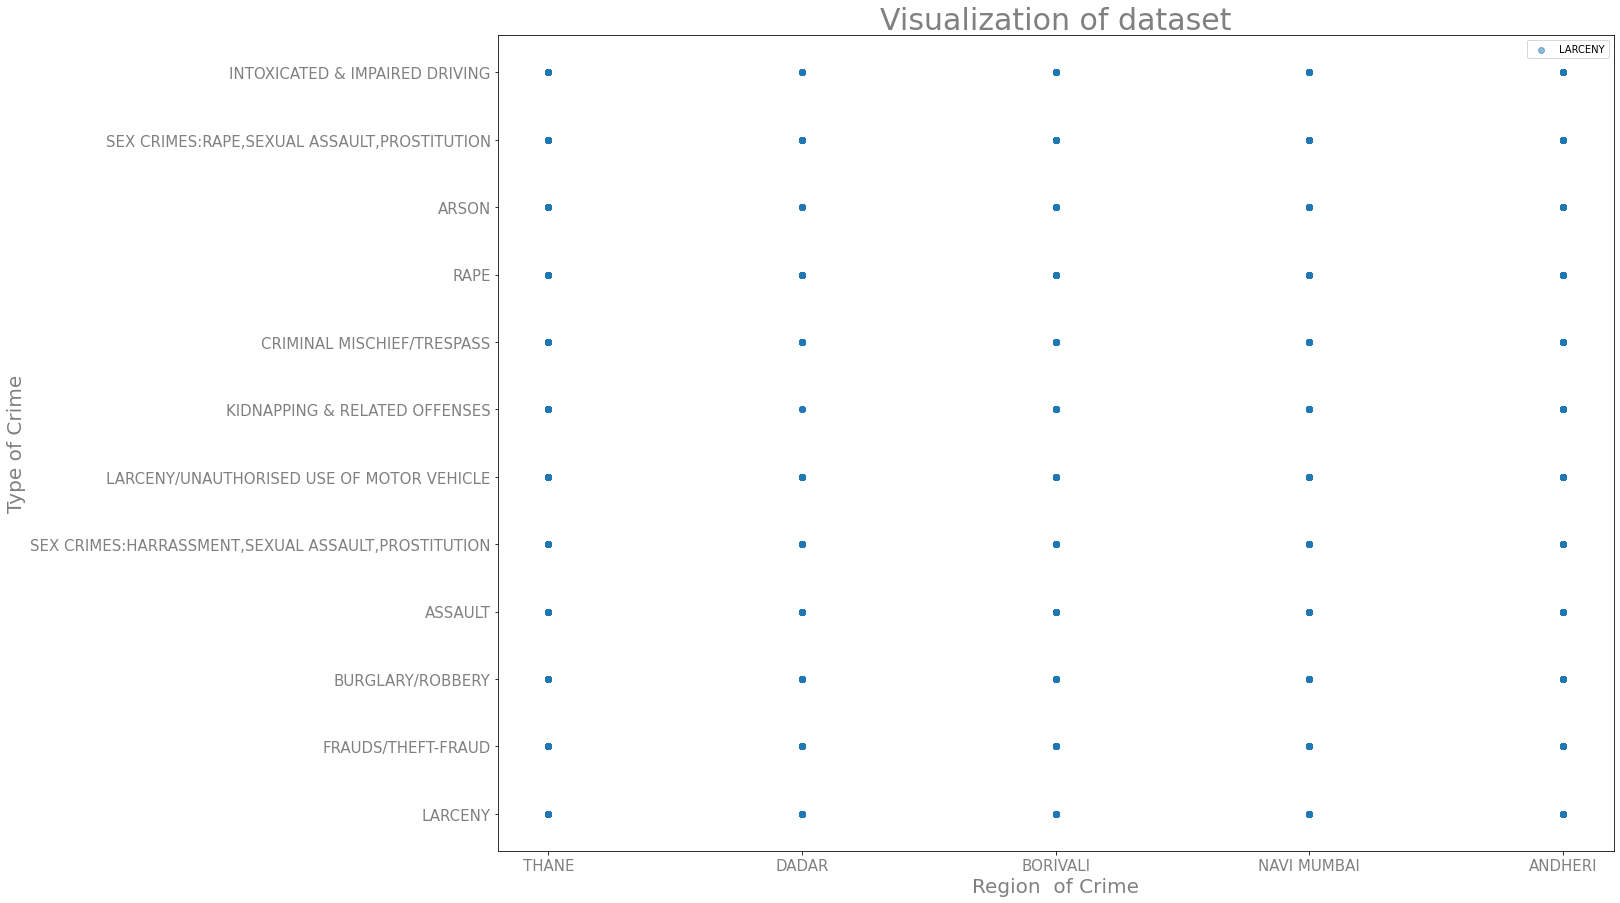

In [0]:
y_axis = mumbai_crime_data['DESCRIPTION_OF_OFFENSE']
x_axis = mumbai_crime_data['AREA_OF_CRIME']
plt.figure(figsize = (20,15))
plt.scatter(x_axis, y_axis, alpha=0.5)
plt.title('Visualization of dataset',color = 'grey',fontsize=30)
plt.ylabel('Type of Crime',color = 'grey',fontsize= 20)
plt.xlabel('Region  of Crime',color = 'grey',fontsize =20)
plt.yticks(color = 'grey',fontsize =15 )
plt.xticks(color = 'grey',fontsize = 15)
plt.legend(labels = y_axis)

plt.show()

In [0]:
dfa= mumbai_crime_data['AREA_OF_CRIME'].value_counts()

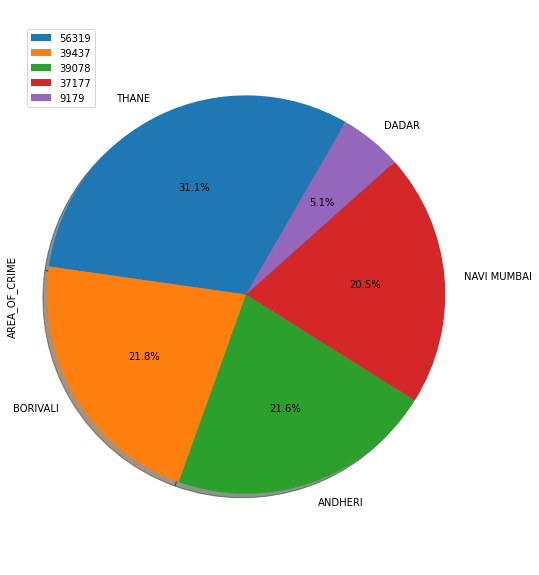

In [0]:
#PIE CHART FOR CRIME DISTRIBUTION AGAINST DIFFERENT AREAS

dfa.plot(kind='pie',figsize=(8,10),subplots = True,
                            autopct='%1.1f%%', # add in percentages
                            startangle=60,     # start angle 90
                            shadow=True,       # add shadow      
                            )
#plt.ylabel(color = 'grey')
plt.title('FREQUENCY OF CRIME', color = 'white',size = 15)
plt.axis('equal') # Sets the pie chart to look like a circle.

plt.legend(labels=dfa, loc='upper left') 

plt.show()

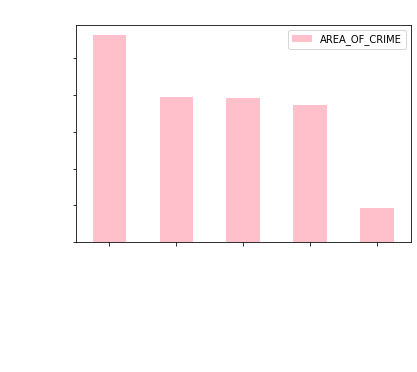

In [0]:
#BAR GRAPH FOR CRIME DISTRIBUTION AGAINST DIFFERENT AREAS

dfa = pd.DataFrame(dfa)
dfa.plot(kind = 'bar', color = "pink")
plt.title('DISTRIBUTION OF CRIME AGAINST AREA', color = 'white',size = 15)


plt.legend(labels=dfa, loc='upper right')
plt.xlabel("AREA OF CRIME", color = "white",fontsize = 10 )
plt.ylabel("NO. OF CRIMES",color = "white",fontsize = 10 )
plt.yticks(color = 'white',fontsize =15 )
plt.xticks(color = 'white',fontsize = 15)

plt.show()

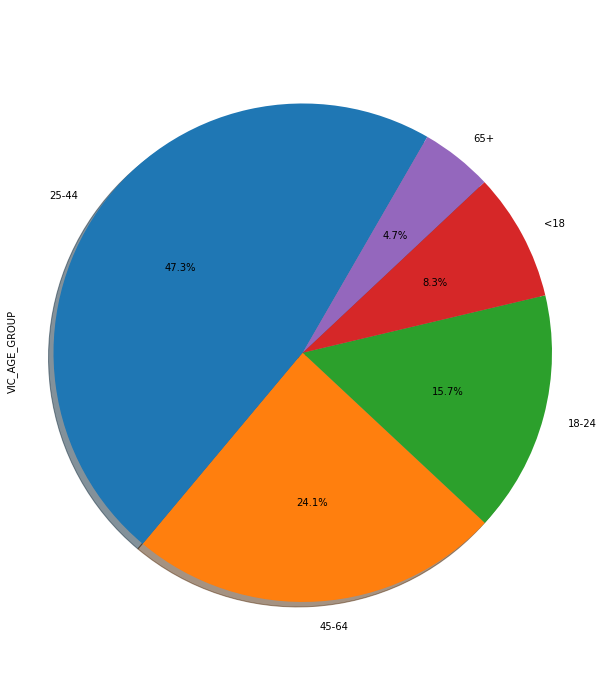

In [0]:

#PIE CHART FOR CRIME DISTRIBUTION AGAINST DIFFERENT AGE GROUPS
cd1 =  mumbai_crime_data['VIC_AGE_GROUP'].value_counts()
cd1.plot(kind='pie',figsize=(10,12),subplots = True,
                            autopct='%1.1f%%', # add in percentages
                            startangle=60,     # start angle 90
                            shadow=True,       # add shadow      
                            )

plt.title('DISTRIBUTION OF CRIME AGAINST AGE GROUP', color = 'white',size = 15)
plt.axis('equal') # Sets the pie chart to look like a circle.



plt.show()


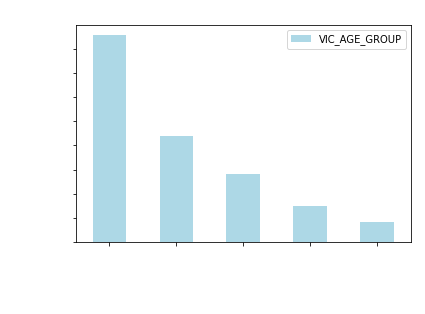

In [0]:
#BAR GRAPH FOR CRIME DISTRIBUTION AGAINST DIFFERENT AGE GROUPS

cd1 = pd.DataFrame(cd1)
cd1.plot(kind = 'bar', color = "lightblue")
plt.title('DISTRIBUTION OF CRIME AGAINST AGE GROUP', color = 'white',size = 15)


plt.legend(labels=cd1, loc='upper right')
plt.xlabel("AGE GROUP", color = "white",fontsize = 10 )
plt.ylabel("NO. OF CRIMES",color = "white",fontsize = 10 )
plt.yticks(color = 'white',fontsize =15 )
plt.xticks(color = 'white',fontsize = 15)

plt.show()

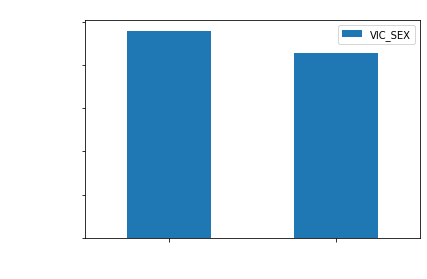

In [0]:

#BAR GRAPH - NO OF CRIMES vs SEX OF VICTIM

VC = pd.DataFrame(mumbai_crime_data['VIC_SEX'].value_counts()) #VC= datset for count of victim sex
VC.plot(kind = 'bar')

plt.title("COUNT OF CRIMES BASED ON GENDER",color = "white", fontsize = 10)
plt.xlabel("GENDER", color = "white",fontsize = 10 )
plt.ylabel("NO. OF CRIMES",color = "white",fontsize = 10 )
plt.yticks(color = 'white',fontsize =15 )
plt.xticks(color = 'white',fontsize = 15)

plt.show()

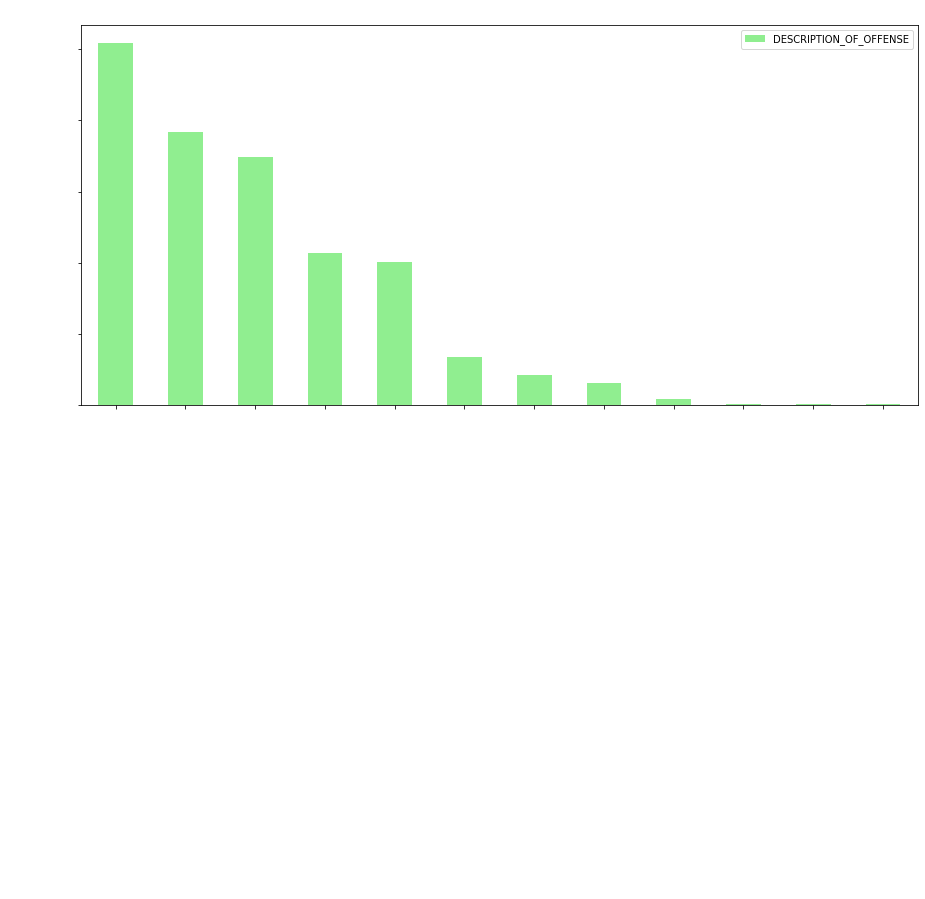

In [0]:

dcc = mumbai_crime_data['DESCRIPTION_OF_OFFENSE'].value_counts()

dcc = pd.DataFrame(dcc)
dch = dcc.head(24)
dch.plot(kind = 'bar', color = "lightgreen",figsize = (15,7))

plt.title('DISTRIBUTION OF TYPE CRIME', color = 'white',size = 15)


plt.legend(labels=dch, loc='upper right')
plt.xlabel("TYPE OF CRIME", color = "white",fontsize = 15 )
plt.ylabel("NO. OF CRIMES",color = "white",fontsize = 15 )
plt.yticks(color = 'white',fontsize =15 )
plt.xticks(color = 'white',fontsize = 15)

plt.show()

In [0]:
mumbai_crime_data.shape

(181190, 8)

In [0]:
mumbai_crime_data.head(5)

,FILING_DATE_OF_COMPLAINT,DESCRIPTION_OF_OFFENSE,OFFENSE_DESCRIPTION_IN_DETAIL,PLACE_OF_CRIME,CRIME_ACC_LAW,AREA_OF_CRIME,VIC_AGE_GROUP,VIC_SEX
0,04/10/2008,LARCENY,"LARCENY,PETIT FROM AUTO",STREET,MISDEMEANOR,THANE,18-24,M
1,04/11/2006,FRAUDS/THEFT-FRAUD,"FRAUD,UNCLASSIFIED-FELONY",COMMERCIAL BUILDING,FELONY,DADAR,25-44,M
2,04/21/2006,BURGLARY/ROBBERY,"ROBBERY,DWELLING",RESIDENCE - PUBLIC HOUSING,FELONY,BORIVALI,25-44,M
4,08/12/2007,ASSAULT,"ASSAULT 2,1,UNCLASSIFIED",STREET,FELONY,NAVI MUMBAI,<18,M
5,08/15/2006,LARCENY,"LARCENY,GRAND FROM PERSON,UNCL",STREET,FELONY,ANDHERI,<18,F


In [0]:
mumbai_crime_data = mumbai_crime_data[['VIC_SEX','VIC_AGE_GROUP','PLACE_OF_CRIME','AREA_OF_CRIME','DESCRIPTION_OF_OFFENSE']]

In [0]:
mumbai_crime_data.tail()

,VIC_SEX,VIC_AGE_GROUP,PLACE_OF_CRIME,AREA_OF_CRIME,DESCRIPTION_OF_OFFENSE
228062,F,25-44,RESIDENCE - APT. HOUSE,THANE,"SEX CRIMES:HARRASSMENT,SEXUAL ASSAULT,PROSTITU..."
228065,F,18-24,RESIDENCE - PUBLIC HOUSING,THANE,ASSAULT
228066,F,25-44,STREET,THANE,ASSAULT
228067,M,45-64,STREET,NAVI MUMBAI,"SEX CRIMES:HARRASSMENT,SEXUAL ASSAULT,PROSTITU..."
228068,F,18-24,RESTAURANT/DINER,BORIVALI,LARCENY


In [0]:
mumbai_crime_data.shape

(181190, 5)

In [0]:


"""dcm = mumbai_crime_data['MONTH'].value_counts()
dcm.plot(kind = 'bar', color = "lightgreen",figsize = (15,8)) 

plt.title('DISTRIBUTION OF CRIME OVER MONTHS', color = 'white',size = 15)


plt.xlabel("MONTH", color = "white",fontsize = 15 )
plt.ylabel("NO. OF CRIMES",color = "white",fontsize = 15 )
plt.yticks(color = 'white',fontsize =15 )
plt.xticks(color = 'white',fontsize = 15)


plt.show()"""

'dcm = mumbai_crime_data[\'MONTH\'].value_counts()\ndcm.plot(kind = \'bar\', color = "lightgreen",figsize = (15,8)) \n\nplt.title(\'DISTRIBUTION OF CRIME OVER MONTHS\', color = \'white\',size = 15)\n\n\nplt.xlabel("MONTH", color = "white",fontsize = 15 )\nplt.ylabel("NO. OF CRIMES",color = "white",fontsize = 15 )\nplt.yticks(color = \'white\',fontsize =15 )\nplt.xticks(color = \'white\',fontsize = 15)\n\n\nplt.show()'

In [0]:
mumbai_crime_data2 = mumbai_crime_data

In [0]:
mumbai_crime_data2.head()

,VIC_SEX,VIC_AGE_GROUP,PLACE_OF_CRIME,AREA_OF_CRIME,DESCRIPTION_OF_OFFENSE
0,M,18-24,STREET,THANE,LARCENY
1,M,25-44,COMMERCIAL BUILDING,DADAR,FRAUDS/THEFT-FRAUD
2,M,25-44,RESIDENCE - PUBLIC HOUSING,BORIVALI,BURGLARY/ROBBERY
4,M,<18,STREET,NAVI MUMBAI,ASSAULT
5,F,<18,STREET,ANDHERI,LARCENY


#### Down sampling to 113 rows per class

In [0]:
label= 'DESCRIPTION_OF_OFFENSE'

g = mumbai_crime_data2.groupby(label, group_keys=False)
mumbai_crime_data_balanced = pd.DataFrame(g.apply(lambda x: x.sample(g.size().min()))).reset_index(drop=True)
g

In [0]:
mumbai_crime_data_balanced.head()

,VIC_SEX,VIC_AGE_GROUP,PLACE_OF_CRIME,AREA_OF_CRIME,DESCRIPTION_OF_OFFENSE
0,F,25-44,RESIDENCE - PUBLIC HOUSING,NAVI MUMBAI,ARSON
1,M,25-44,FOOD SUPERMARKET,DADAR,ARSON
2,F,25-44,STREET,BORIVALI,ARSON
3,F,45-64,RESIDENCE - PUBLIC HOUSING,NAVI MUMBAI,ARSON
4,F,25-44,RESIDENCE - APT. HOUSE,NAVI MUMBAI,ARSON


In [0]:
mumbai_crime_data_balanced.shape

(1356, 5)

In [0]:
mumbai_crime_data_balanced['DESCRIPTION_OF_OFFENSE'].value_counts()

LARCENY                                               113
CRIMINAL MISCHIEF/TRESPASS                            113
RAPE                                                  113
SEX CRIMES:RAPE,SEXUAL ASSAULT,PROSTITUTION           113
LARCENY/UNAUTHORISED USE OF MOTOR VEHICLE             113
ARSON                                                 113
BURGLARY/ROBBERY                                      113
FRAUDS/THEFT-FRAUD                                    113
SEX CRIMES:HARRASSMENT,SEXUAL ASSAULT,PROSTITUTION    113
KIDNAPPING & RELATED OFFENSES                         113
ASSAULT                                               113
INTOXICATED & IMPAIRED DRIVING                        113
Name: DESCRIPTION_OF_OFFENSE, dtype: int64

####Balancing dataset using both down an dup sampling

In [0]:
#separating majority and minority classes

majority_crimes = ['LARCENY','ASSAULT','SEX CRIMES:HARRASSMENT,SEXUAL ASSAULT,PROSTITUTION', 
                   'CRIMINAL MISCHIEF/TRESPASS','BURGLARY/ROBBERY']

crime_majority = mumbai_crime_data2[mumbai_crime_data2['DESCRIPTION_OF_OFFENSE'].isin(majority_crimes)]

In [0]:
crime_majority.head()

,VIC_SEX,VIC_AGE_GROUP,PLACE_OF_CRIME,AREA_OF_CRIME,DESCRIPTION_OF_OFFENSE
0,M,18-24,STREET,THANE,LARCENY
2,M,25-44,RESIDENCE - PUBLIC HOUSING,BORIVALI,BURGLARY/ROBBERY
4,M,<18,STREET,NAVI MUMBAI,ASSAULT
5,F,<18,STREET,ANDHERI,LARCENY
7,M,45-64,STREET,NAVI MUMBAI,LARCENY


In [0]:
crime_majority.shape

(165746, 5)

In [0]:
crime_majority['DESCRIPTION_OF_OFFENSE'].value_counts()

LARCENY                                               50892
ASSAULT                                               38426
SEX CRIMES:HARRASSMENT,SEXUAL ASSAULT,PROSTITUTION    34907
CRIMINAL MISCHIEF/TRESPASS                            21441
BURGLARY/ROBBERY                                      20080
Name: DESCRIPTION_OF_OFFENSE, dtype: int64

In [0]:
crime_minority = mumbai_crime_data2[~mumbai_crime_data2['DESCRIPTION_OF_OFFENSE'].isin(majority_crimes)]

In [0]:
crime_minority.head()

,VIC_SEX,VIC_AGE_GROUP,PLACE_OF_CRIME,AREA_OF_CRIME,DESCRIPTION_OF_OFFENSE
1,M,25-44,COMMERCIAL BUILDING,DADAR,FRAUDS/THEFT-FRAUD
6,M,45-64,OTHER,THANE,FRAUDS/THEFT-FRAUD
16,M,25-44,STREET,NAVI MUMBAI,LARCENY/UNAUTHORISED USE OF MOTOR VEHICLE
23,F,65+,RESIDENCE - APT. HOUSE,BORIVALI,KIDNAPPING & RELATED OFFENSES
37,M,45-64,RESIDENCE-HOUSE,THANE,FRAUDS/THEFT-FRAUD


In [0]:
crime_minority['DESCRIPTION_OF_OFFENSE'].value_counts()

LARCENY/UNAUTHORISED USE OF MOTOR VEHICLE      6758
FRAUDS/THEFT-FRAUD                             4287
SEX CRIMES:RAPE,SEXUAL ASSAULT,PROSTITUTION    3063
RAPE                                            873
INTOXICATED & IMPAIRED DRIVING                  205
KIDNAPPING & RELATED OFFENSES                   145
ARSON                                           113
Name: DESCRIPTION_OF_OFFENSE, dtype: int64

In [0]:
crime_minority.head()

,VIC_SEX,VIC_AGE_GROUP,PLACE_OF_CRIME,AREA_OF_CRIME,DESCRIPTION_OF_OFFENSE
1,M,25-44,COMMERCIAL BUILDING,DADAR,FRAUDS/THEFT-FRAUD
6,M,45-64,OTHER,THANE,FRAUDS/THEFT-FRAUD
16,M,25-44,STREET,NAVI MUMBAI,LARCENY/UNAUTHORISED USE OF MOTOR VEHICLE
23,F,65+,RESIDENCE - APT. HOUSE,BORIVALI,KIDNAPPING & RELATED OFFENSES
37,M,45-64,RESIDENCE-HOUSE,THANE,FRAUDS/THEFT-FRAUD


In [0]:
	
from sklearn.utils import resample

#####Down sampling majority crime

In [0]:
label= 'DESCRIPTION_OF_OFFENSE'

g = crime_majority.groupby(label, group_keys=False)
crime_majority_downsampled = pd.DataFrame(g.apply(lambda x: x.sample(g.size().min()))).reset_index(drop=True)

In [0]:
crime_majority_downsampled['DESCRIPTION_OF_OFFENSE'].value_counts()

ASSAULT                                               20080
LARCENY                                               20080
CRIMINAL MISCHIEF/TRESPASS                            20080
SEX CRIMES:HARRASSMENT,SEXUAL ASSAULT,PROSTITUTION    20080
BURGLARY/ROBBERY                                      20080
Name: DESCRIPTION_OF_OFFENSE, dtype: int64

#####Up Sampling of Minority Data

In [0]:
crime_minority_upsampled = crime_minority.groupby(label ,as_index = False,group_keys=False).apply(lambda s: s.sample(20080,replace=True))


In [0]:
crime_minority_upsampled['DESCRIPTION_OF_OFFENSE'].value_counts()

FRAUDS/THEFT-FRAUD                             20080
SEX CRIMES:RAPE,SEXUAL ASSAULT,PROSTITUTION    20080
ARSON                                          20080
LARCENY/UNAUTHORISED USE OF MOTOR VEHICLE      20080
INTOXICATED & IMPAIRED DRIVING                 20080
RAPE                                           20080
KIDNAPPING & RELATED OFFENSES                  20080
Name: DESCRIPTION_OF_OFFENSE, dtype: int64

##### Combining the balanced datasets

In [0]:
mumbai_crime_data_balanced = pd.concat([crime_majority_downsampled,crime_minority_upsampled])

In [0]:
mumbai_crime_data_balanced['DESCRIPTION_OF_OFFENSE'].value_counts()

ASSAULT                                               20080
LARCENY                                               20080
SEX CRIMES:RAPE,SEXUAL ASSAULT,PROSTITUTION           20080
SEX CRIMES:HARRASSMENT,SEXUAL ASSAULT,PROSTITUTION    20080
LARCENY/UNAUTHORISED USE OF MOTOR VEHICLE             20080
FRAUDS/THEFT-FRAUD                                    20080
CRIMINAL MISCHIEF/TRESPASS                            20080
ARSON                                                 20080
INTOXICATED & IMPAIRED DRIVING                        20080
RAPE                                                  20080
BURGLARY/ROBBERY                                      20080
KIDNAPPING & RELATED OFFENSES                         20080
Name: DESCRIPTION_OF_OFFENSE, dtype: int64

In [0]:
mumbai_crime_data_balanced.shape

(240960, 5)

####Converting Categorical Variables to Numerical data before modeling.

In [0]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import numpy as np

In [0]:
crime_majority_downsampled.shape

(100400, 5)

In [0]:
crime_majority_downsampled.head()

,VIC_SEX,VIC_AGE_GROUP,PLACE_OF_CRIME,AREA_OF_CRIME,DESCRIPTION_OF_OFFENSE
0,M,18-24,BAR/NIGHT CLUB,NAVI MUMBAI,ASSAULT
1,M,18-24,SCHOOL,ANDHERI,ASSAULT
2,F,18-24,RESIDENCE - PUBLIC HOUSING,THANE,ASSAULT
3,M,18-24,RESIDENCE - APT. HOUSE,THANE,ASSAULT
4,M,25-44,RESIDENCE - APT. HOUSE,THANE,ASSAULT


In [0]:
data = mumbai_crime_data.iloc[:,0:3]
data.head()

,VIC_SEX,VIC_AGE_GROUP,PLACE_OF_CRIME
0,M,18-24,STREET
1,M,25-44,COMMERCIAL BUILDING
2,M,25-44,RESIDENCE - PUBLIC HOUSING
4,M,<18,STREET
5,F,<18,STREET


In [0]:
le = LabelEncoder()

In [0]:
mumbai_crime_data_balanced = mumbai_crime_data_balanced.apply(LabelEncoder().fit_transform)



In [0]:
mumbai_crime_data_balanced.tail()

,VIC_SEX,VIC_AGE_GROUP,PLACE_OF_CRIME,AREA_OF_CRIME,DESCRIPTION_OF_OFFENSE
207488,0,4,40,4,11
147495,1,4,41,0,11
175066,0,4,39,3,11
52920,0,4,39,1,11
153247,0,1,38,3,11


In [0]:
mumbai_crime_data_balanced['DESCRIPTION_OF_OFFENSE'].value_counts()

11    20080
10    20080
9     20080
8     20080
7     20080
6     20080
5     20080
4     20080
3     20080
2     20080
1     20080
0     20080
Name: DESCRIPTION_OF_OFFENSE, dtype: int64


###Trial Model 

In [0]:
X = mumbai_crime_data_balanced.iloc[:,1:]
y = mumbai_crime_data_balanced.iloc[:,0]

In [0]:
X.head()

,VIC_AGE_GROUP,PLACE_OF_CRIME,AREA_OF_CRIME,DESCRIPTION_OF_OFFENSE
0,0,4,3,1
1,0,43,0,1
2,0,40,4,1
3,0,39,4,1
4,1,39,4,1


In [0]:
y.head()

0    1
1    1
2    0
3    1
4    1
Name: VIC_SEX, dtype: int64

In [0]:

import sklearn

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.05, random_state = 50)

In [0]:
y_test.shape

(12048,)

####KNN Classifier

In [0]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=95,weights = 'distance')
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=95, p=2,
                     weights='distance')

In [0]:
custom_input = [[1,1,10,2]]  #LOOKIING FOR PREDICTION ON JUST ONE ENTRY

In [0]:
y_custom_predicted = knn.predict(custom_input)
print(custom_input,y_custom_predicted)#PREDICTION ON ONE ENTRY

[[1, 1, 10, 2]] [0]


In [0]:
y_pred = knn.predict(X_test)

In [0]:
knn.score(X_train,y_train)

0.7190623471028168

In [0]:
knn.score(X_test,y_test)

0.7104913678618858

In [0]:
from sklearn import metrics
#print("Train set Accuracy: " ,metrics.accuracy_score(y_train, knn.predict(X_train)))
print("Test set Accuracy:", metrics.accuracy_score(y_test,y_pred))

Test set Accuracy: 0.7104913678618858


In [0]:
from sklearn.metrics import jaccard_similarity_score
jaccard_score = jaccard_similarity_score(y_test, y_pred)
print("jaccard score: ", jaccard_score)

jaccard score:  0.7104913678618858


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


In [0]:


from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn,X_test,y_test , cv=5)
scores.mean()

0.6987057180111235

In [0]:
print("Train set Accuracy: " ,metrics.accuracy_score(y_train, knn.predict(X_train)))

Train set Accuracy:  0.7190623471028168


In [0]:
error_rate = []
for i in range(25,100,10):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

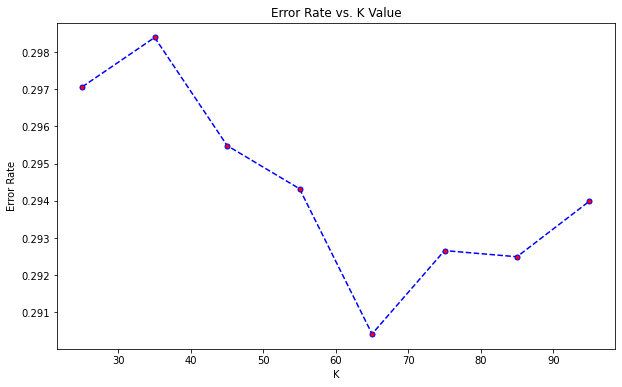

In [0]:


plt.figure(figsize=(10,6))
plt.plot(range(25,100,10),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=5)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')


####Decision Tree Classifier

In [0]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion = "entropy", random_state=300, class_weight = "balanced")

In [0]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=300, splitter='best')

In [0]:
y_predd = dtree.predict(X_test)

In [0]:
from sklearn import metrics
print("Train set Accuracy: " ,metrics.accuracy_score(y_train, dtree.predict(X_train)))
print("Test set Accuracy:", metrics.accuracy_score(y_test,y_predd))

Train set Accuracy:  0.7175595862165374
Test set Accuracy: 0.7103253652058433


In [0]:
from sklearn.metrics import jaccard_similarity_score
jaccard_score = jaccard_similarity_score(y_test, y_predd)
print("jaccard score: ", jaccard_score)

jaccard score:  0.7103253652058433


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


In [0]:
 from sklearn.model_selection import cross_val_score
 scores = cross_val_score(dtree,X_test,y_test , cv=5)
 scores.mean()

0.6949713126260616

Text(0, 0.5, 'Error Rate')

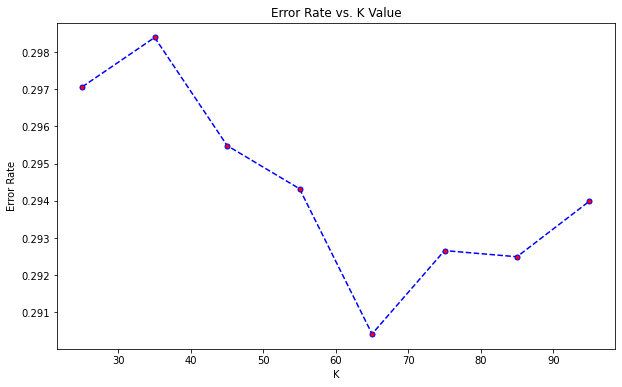

In [0]:
plt.figure(figsize=(10,6))
plt.plot(range(25,100,10),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=5)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

####Random Forest Classifier

In [0]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=25, criterion = 'entropy', class_weight = 'balanced')
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=25,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
y_pred_rfc = rfc.predict(X_test)

In [0]:
print("Train set Accuracy: " ,metrics.accuracy_score(y_train, rfc.predict(X_train)))
print("Test set Accuracy:", metrics.accuracy_score(y_test,y_pred_rfc))

Train set Accuracy:  0.7171838959949675
Test set Accuracy: 0.710574369189907


In [0]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, y_pred_rfc)


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


0.710574369189907

In [0]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rfc,X_test,y_test , cv=5)
scores.mean()

0.6951371154849811

In [0]:
error_rate = []
for i in range(25,100,10):
    
    rfc = RandomForestClassifier(n_estimators=i, criterion = 'entropy', class_weight = 'balanced')
    rfc.fit(X_train, y_train)
    pred_i = rfc.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

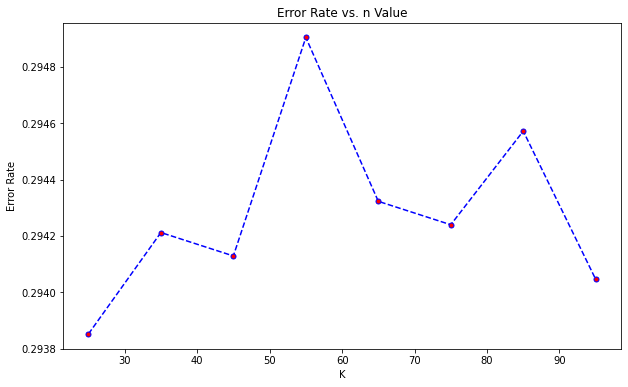

In [0]:
plt.figure(figsize=(10,6))
plt.plot(range(25,100,10),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=5)
plt.title('Error Rate vs. n Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

####Support Vector Machine Classifier

In [0]:
error_rate = []
for i in range(1,140):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

In [0]:
y_pred_svm  = svm_.predict(X_test)


In [0]:
from sklearn import metrics
#print("Train set Accuracy: " ,metrics.accuracy_score(y_train, rfc.predict(X_train)))
print("Test set Accuracy:", metrics.accuracy_score(y_test,y_pred_svm))

Test set Accuracy: 0.31544020056038935


In [0]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, y_pred_svm)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


0.31544020056038935

In [0]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rfc,X_test,y_test , cv=5)
scores.mean()

####Logistic Regression

In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
logr = LogisticRegression(class_weight = "balanced",max_iter=1000)

In [0]:
logr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
y_pred_log = logr.predict(X_test)

In [0]:
from sklearn import metrics
print("Train set Accuracy: " ,metrics.accuracy_score(y_train, rfc.predict(X_train)))
print("Test set Accuracy:", metrics.accuracy_score(y_test,y_pred_log))

Train set Accuracy:  0.717551363174752
Test set Accuracy: 0.6011232846392209


In [0]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rfc,X_test,y_test , cv=5)
scores.mean()

0.6968513802129603

####Adaboost Algorithm

In [0]:
from sklearn import svm

svm_= svm.SVC(class_weight = 'balanced')

In [0]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=25, criterion = 'entropy', class_weight = 'balanced')

In [0]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion = "entropy", random_state=300, class_weight = "balanced")

In [0]:
from sklearn.ensemble import AdaBoostClassifier

adbc = AdaBoostClassifier(rfc)

adbc.fit(X_train,y_train)


AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=RandomForestClassifier(bootstrap=True,
                                                         ccp_alpha=0.0,
                                                         class_weight='balanced',
                                                         criterion='entropy',
                                                         max_depth=None,
                                                         max_features='auto',
                                                         max_leaf_nodes=None,
                                                         max_samples=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                              

In [0]:
y_pred_adbc= adbc.predict(X_test)

In [0]:
from sklearn import metrics
print("Train set Accuracy: " ,metrics.accuracy_score(y_train, adbc.predict(X_train)))
print("Test set Accuracy:", metrics.accuracy_score(y_test,y_pred_adbc))

Train set Accuracy:  0.7178443090383564
Test set Accuracy: 0.7057049579459937


In [0]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, y_pred_adbc)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


0.7050409473218238

In [0]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(adbc,X_test,y_test , cv=5)
scores.mean()

0.29772199839770985